In [124]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
import seaborn as sns
import json
import datetime as dt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [125]:
df = pd.read_excel('../input/pietsmiet-tv-thumbnails-labeled/PietSmietTV_labeled.xlsx')
df = df.drop(['json', 'index'], axis=1).fillna(0).rename(columns={'Brammen()':'Brammen', 'Chris()':'Chris', 'Jay()':'Jay', 'Piet()':'Piet', 'Sep()':'Sep'})
df['Sum'] = np.sum(df[['Brammen', 'Chris', 'Jay', 'Piet', 'Sep']], axis=1)
df['Paths'] = '../input/pietsmiettv-json-paths/' + df['Paths'].str.replace('.jpg', '.info.json')
df

,Paths,date,Brammen,Chris,Jay,Piet,Sep,Sum
0,../input/pietsmiettv-json-paths/React _ PietSm...,2020-08-27,1.0,0.0,0.0,0.0,0.0,1.0
1,../input/pietsmiettv-json-paths/gamescom Openi...,2020-08-27,1.0,1.0,1.0,1.0,1.0,5.0
2,../input/pietsmiettv-json-paths/React _ gamesc...,2020-08-26,1.0,1.0,0.0,1.0,1.0,4.0
3,../input/pietsmiettv-json-paths/React _ I Made...,2020-08-25,0.0,0.0,0.0,1.0,0.0,1.0
4,../input/pietsmiettv-json-paths/React _ Google...,2020-08-24,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
930,../input/pietsmiettv-json-paths/Angetestet _ B...,2012-03-02,0.0,0.0,0.0,0.0,0.0,0.0
931,../input/pietsmiettv-json-paths/Angetestet _ S...,2012-02-26,0.0,0.0,0.0,0.0,0.0,0.0
932,../input/pietsmiettv-json-paths/Angetestet _ S...,2012-02-25,0.0,0.0,0.0,0.0,0.0,0.0
933,../input/pietsmiettv-json-paths/Angetestet _ S...,2012-02-24,0.0,0.0,0.0,0.0,0.0,0.0


In [126]:
#Moving Average
df['Average'] = 0.00
i = 7
alpha = 0.4

while i < len(df['Sum']):
    df['Average'][i] = np.mean(df['Sum'][i-7:i])
    i +=1

#Views
view_count = []
for path in df['Paths']:
    with open(path) as json_file: 
        data = json.load(json_file)
    view_count.append(data['view_count'])
    
df['Views'] = view_count

#Auf 10 Minuten gestreckt
duration = []
for path in df['Paths']:
    with open(path) as json_file: 
        data = json.load(json_file)
    duration.append(data['duration'])
    
df['duration (Min)'] = duration
df['duration (Min)'] = (df['duration (Min)'] / 60).astype(int)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [127]:
df['Paths'] = df['Paths'].str.replace('../input/pietsmiettv-json-paths/', '')
df

,Paths,date,Brammen,Chris,Jay,Piet,Sep,Sum,Average,Views,duration (Min)
0,React _ PietSmiet kocht Maggi Fix ohne Maggi F...,2020-08-27,1.0,0.0,0.0,0.0,0.0,1.0,0.0,139393,28
1,gamescom Opening Night Live React_N6FfpOFo02M....,2020-08-27,1.0,1.0,1.0,1.0,1.0,5.0,0.0,9452,122
2,React _ gamescom 2012 _ Der Samstag__rfq8LJMg2...,2020-08-26,1.0,1.0,0.0,1.0,1.0,4.0,0.0,150908,22
3,React _ I Made Millions by Managing a Team of ...,2020-08-25,0.0,0.0,0.0,1.0,0.0,1.0,0.0,149513,21
4,React _ Google Translate kocht einen Shepard_s...,2020-08-24,1.0,0.0,0.0,0.0,0.0,1.0,0.0,129810,8
...,...,...,...,...,...,...,...,...,...,...,...
930,Angetestet _ Brawl Busters _Deutsch_Full_HD_ _...,2012-03-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24277,17
931,Angetestet _ Syndicate _Deutsch_Full_HD_ _ Die...,2012-02-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18087,15
932,Angetestet _ Syndicate _Deutsch_Full_HD_ _ Die...,2012-02-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18068,15
933,Angetestet _ Syndicate _Deutsch_Full_HD_ _ Die...,2012-02-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22852,16


In [128]:
n = df[df['Sum'] > 0].count()[0]
print('In {} Thumbnails ist mindestens einer der Jungs zu sehen. Das entspricht {}% aller Thumbnails.'.format(n, round(n/df.count()[0]*100, 2)))

m = df[(df['Sum'] > 0)&(df['date'] > '01.01.2018')].count()[0]
print('Seit Anfang 2018 enthielten {} Thumbnails mindestens einen der Jungs. Das entspricht {}%.'.format(m, round(m/df[(df['date'] > '01.01.2018')].count()[0]*100, 2)))

print(df['Sum'].value_counts())

In 554 Thumbnails ist mindestens einer der Jungs zu sehen. Das entspricht 59.25% aller Thumbnails.
Seit Anfang 2018 enthielten 433 Thumbnails mindestens einen der Jungs. Das entspricht 79.45%.
0.0    381
1.0    322
2.0    103
4.0     55
5.0     42
3.0     32
Name: Sum, dtype: int64


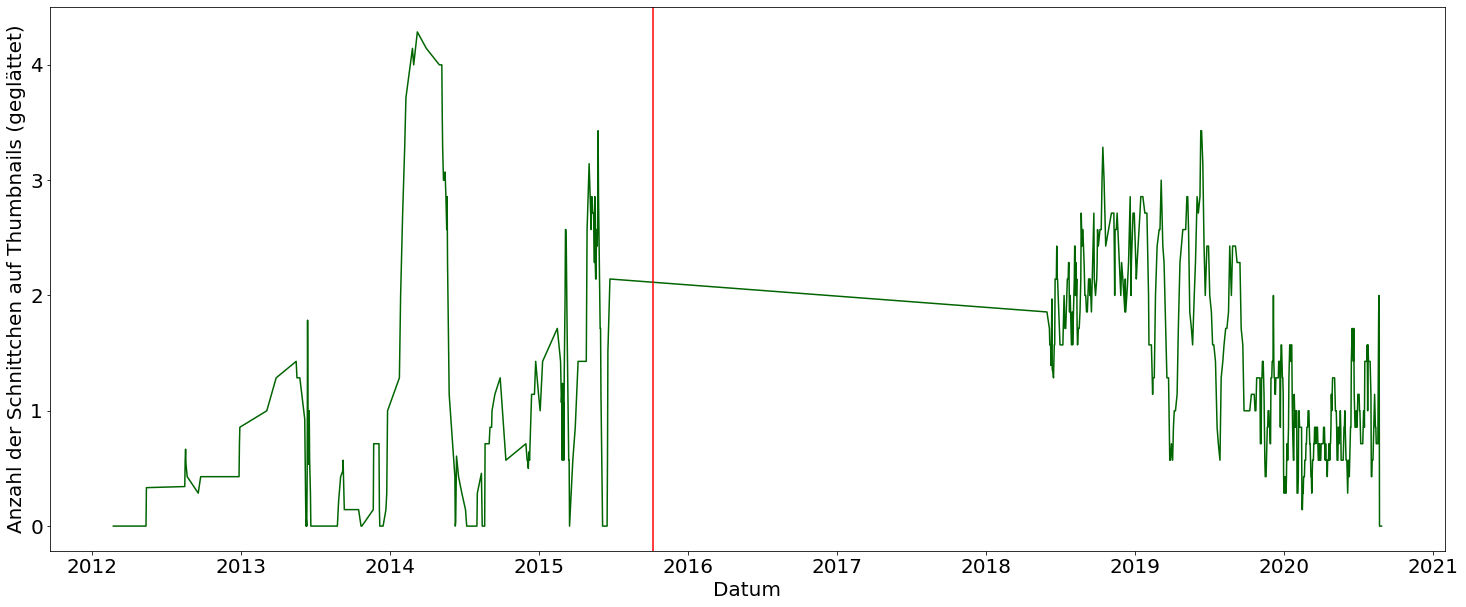

In [129]:
plt.figure(figsize=(25,10))
plt.rcParams.update({'font.size': 20})
fig = sns.lineplot(x=df['date'], y=df['Average'], color='darkgreen', ci=None)
plt.ylabel('Anzahl der Schnittchen auf Thumbnails (geglättet)')
plt.xlabel('Datum')

plt.axvline(dt.datetime(2015, 10, 7), color='red')

#plt.savefig('Summe_Histogramm_insgesamt.jpg')

Text(0.5, 0, 'Datum')

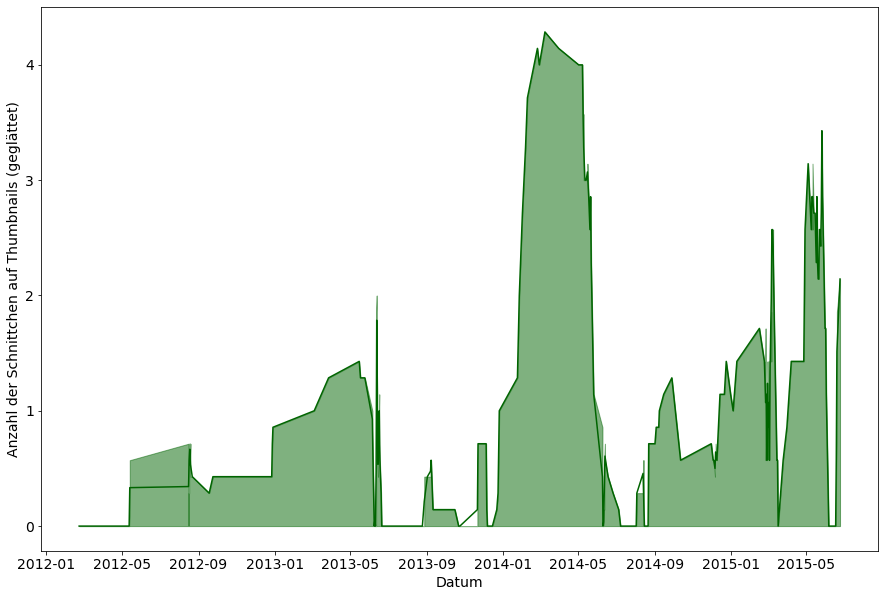

In [130]:
plt.figure(figsize=(15,10))
plt.rcParams.update({'font.size': 14})
sns.lineplot(x=df[df['date']<'01.01.2018']['date'], y=df['Average'], color='darkgreen', ci=None)
plt.fill_between(df[df['date']<'01.01.2018']['date'].values, df[df['date']<'01.01.2018']['Average'].values, alpha=0.5, color='darkgreen')

plt.ylabel('Anzahl der Schnittchen auf Thumbnails (geglättet)')
plt.xlabel('Datum')

#plt.savefig('Summe_Histogramm_vor_Aufbruch.jpg')

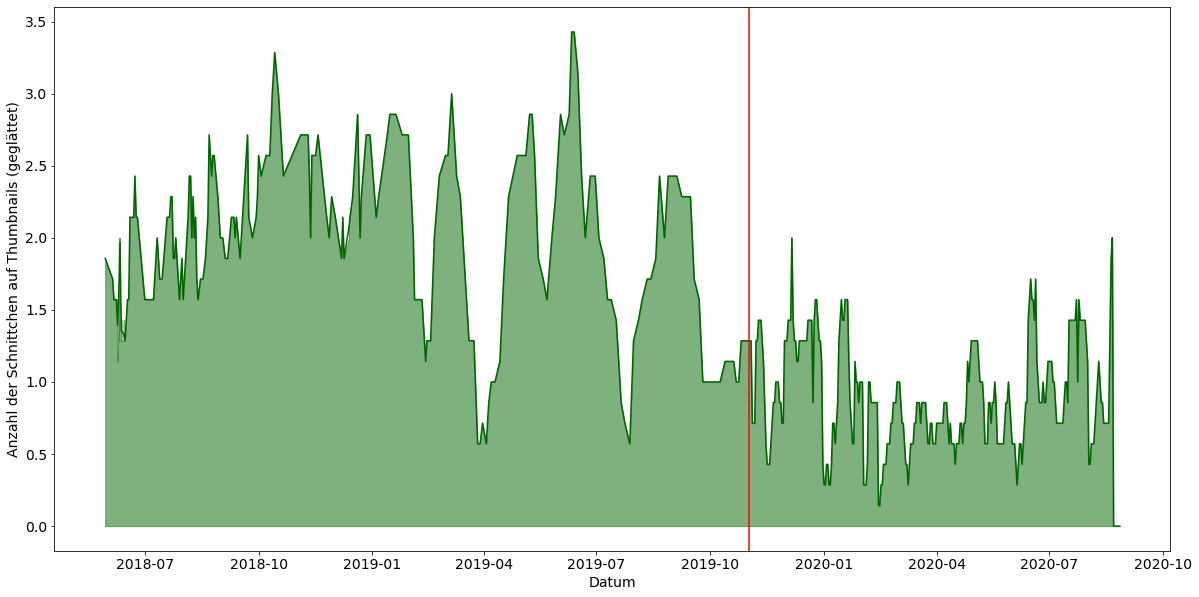

In [131]:
plt.figure(figsize=(20,10))
sns.lineplot(x=df[df['date']>'01.01.2018']['date'], y=df['Average'], color='darkgreen', ci=None)
plt.fill_between(df[df['date']>'01.01.2018']['date'].values, df[df['date']>'01.01.2018']['Average'].values, alpha=0.5, color='darkgreen')
plt.ylabel('Anzahl der Schnittchen auf Thumbnails (geglättet)')
plt.xlabel('Datum')

plt.axvline(dt.datetime(2019, 11, 1), color='red')
#plt.savefig('Summe_Histogramm_nach_Aufbruch.jpg')

In [132]:
df[(df['date']>'01.01.2018')&(df['date']>'01.11.2019')].groupby('Sum').count()

,Paths,date,Brammen,Chris,Jay,Piet,Sep,Average,Views,duration (Min)
Sum,,,,,,,,,,
0.0,104,104,104,104,104,104,104,104,104,104
1.0,223,223,223,223,223,223,223,223,223,223
2.0,19,19,19,19,19,19,19,19,19,19
3.0,10,10,10,10,10,10,10,10,10,10
4.0,3,3,3,3,3,3,3,3,3,3
5.0,28,28,28,28,28,28,28,28,28,28


In [133]:
#Erscheinungen im Zeitverlauf
pre_Aufbruch_ratio = round(df[(df['date']<'07.10.2015')&(df['Sum']>0)]['Sum'].count() / df[df['date']<'07.10.2015']['Sum'].count() *100, 2)
post_Aufbruch_ratio = round(df[(df['date']>'07.10.2015')&(df['Sum']>0)]['Sum'].count() / df[df['date']>'07.10.2015']['Sum'].count()*100, 2)

print('Vor #Aufbruch war in {}% der Thumbnails mindestens einer der Jungs zu sehen. Seit #Aufbruch sind es {}%'.format(pre_Aufbruch_ratio, post_Aufbruch_ratio))

print('\nEinige Monate vor #Aufbruch wurde der Kanal PietSmietTV bis auf weiteres stillgelegt.')
print('Vielleicht ist die Schließung des Kanals ein Indiz dafür wie schwierig diese Zeit für alle Beteiligten war \n'
      'und sie sich in einer Phase der Neuorientierung befanden.')


pre_daily_ratio = round(df[(df['date']<'01.11.2019')&(df['Sum']>0)]['Sum'].count() / df[df['date']<'01.11.2019']['Sum'].count() *100, 2)
post_daily_ratio = round(df[(df['date']>'01.11.2019')&(df['Sum']>0)]['Sum'].count() / df[df['date']>'01.11.2019']['Sum'].count()*100, 2)

print('\nBevor die Daily-reacts begannen waren auf {}% der Thumbnails mindestens einer der Jungs. Seit den Daily Reacts sind es {}%'.format(pre_daily_ratio, post_daily_ratio))

Vor #Aufbruch war in 31.03% der Thumbnails mindestens einer der Jungs zu sehen. Seit #Aufbruch sind es 79.45%

Einige Monate vor #Aufbruch wurde der Kanal PietSmietTV bis auf weiteres stillgelegt.
Vielleicht ist die Schließung des Kanals ein Indiz dafür wie schwierig diese Zeit für alle Beteiligten war 
und sie sich in einer Phase der Neuorientierung befanden.

Bevor die Daily-reacts begannen waren auf 49.45% der Thumbnails mindestens einer der Jungs. Seit den Daily Reacts sind es 73.13%


Text(0.5, 0, 'n = 390')

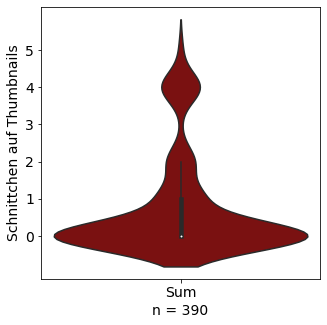

In [134]:
#Schnittchen auf Thumnails VOR der Pause
x = df[df['date']<'07.10.2015'][['date', 'Sum']].set_index('date')

plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(5,5))
sns.violinplot(data=x, color='darkred')
plt.yticks([0,1,2,3,4,5])
plt.ylabel('Schnittchen auf Thumbnails')
plt.xlabel('n = ' + str(x.shape[0]))

#plt.savefig('Gesichter_Verteilung_vor_Aufbruch.jpg')

Text(0.5, 0, 'n = 545')

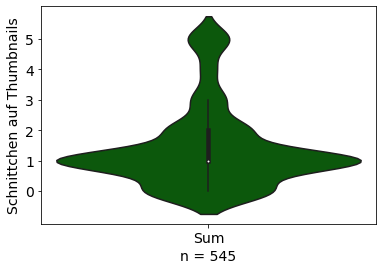

In [135]:
#Schnittchen auf Thumnails NACH der Pause
y = df[df['date']>'07.10.2015'][['date', 'Sum']].set_index('date')
sns.violinplot(data=y, color='darkgreen')
plt.yticks([0,1,2,3,4,5])
plt.ylabel('Schnittchen auf Thumbnails')
plt.xlabel('n = ' + str(y.shape[0]))

#plt.savefig('Gesichter_Verteilung_nach_Aufbruch.jpg')

Text(0.5, 0, 'n = 387')

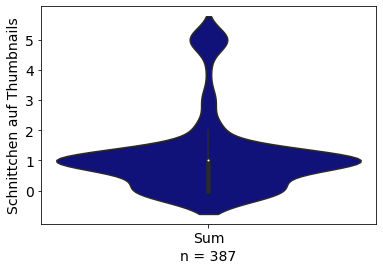

In [136]:
#Schnittchen auf Thumnails SEIT den Daily Reacts
z = df[df['date']>'01.11.2019'][['date', 'Sum']].set_index('date')
sns.violinplot(data=z, color='darkblue')
plt.yticks([0,1,2,3,4,5])
plt.ylabel('Schnittchen auf Thumbnails')
plt.xlabel('n = ' + str(z.shape[0]))

#plt.savefig('Gesichter_Verteilung_seit_Daily.jpg')

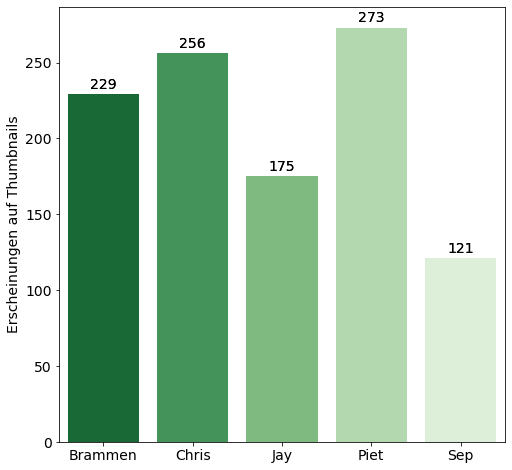

In [137]:
#Wer war wie oft auf Thumbnails (insgesamt)?

app_df = df[['Brammen', 'Chris', 'Jay', 'Piet', 'Sep', 'date']].set_index('date')
#app_df = app_df[app_df.index > '01.11.2019']

pre_break_app = np.sum(app_df)

plt.figure(figsize=(8,8))
sns.barplot(x=pre_break_app.index, y=pre_break_app.values, palette='Set1')
plt.ylabel('Erscheinungen auf Thumbnails')

splot = sns.barplot(x=pre_break_app.index, y=pre_break_app.values, palette='Greens_r')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
    
#plt.savefig('Erscheinungen_pro_Person.jpg')

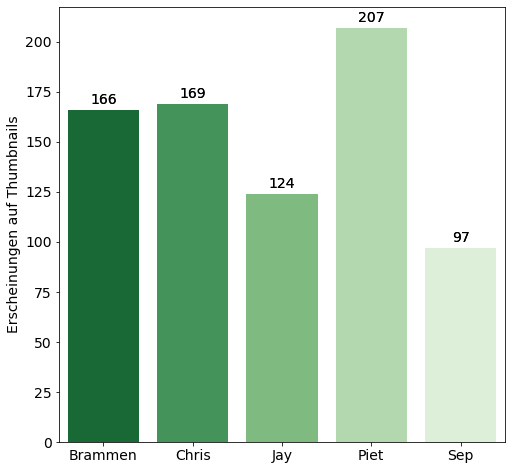

In [138]:
#Wer war wie oft auf Thumbnails (seit #Aufbruch)?

app_df = df[['Brammen', 'Chris', 'Jay', 'Piet', 'Sep', 'date']].set_index('date')
app_df = app_df[app_df.index > '01.11.2017']

pre_break_app = np.sum(app_df)

plt.figure(figsize=(8,8))
sns.barplot(x=pre_break_app.index, y=pre_break_app.values, palette='Greens_r')
plt.ylabel('Erscheinungen auf Thumbnails')

splot = sns.barplot(x=pre_break_app.index, y=pre_break_app.values, palette='Greens_r')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
    
#plt.savefig('Erscheinungen_pro_Person_nach_Aufbruch.jpg')

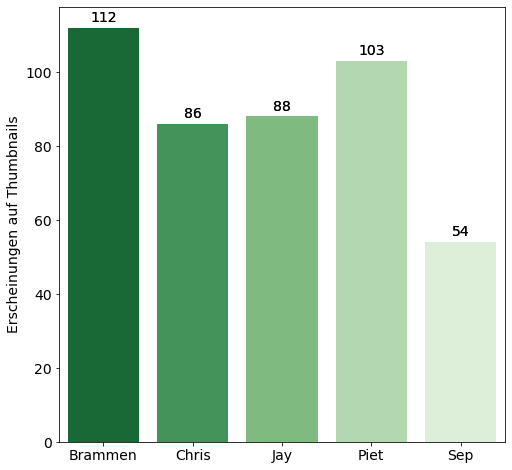

In [139]:
#Wer war wie oft auf Thumbnails (seit Daily Reacts)?

app_df = df[['Brammen', 'Chris', 'Jay', 'Piet', 'Sep', 'date']].set_index('date')
app_df = app_df[app_df.index > '01.11.2019']

pre_break_app = np.sum(app_df)

plt.figure(figsize=(8,8))
sns.barplot(x=pre_break_app.index, y=pre_break_app.values, palette='Greens_r')
plt.ylabel('Erscheinungen auf Thumbnails')

splot = sns.barplot(x=pre_break_app.index, y=pre_break_app.values, palette='Greens_r')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
    
#plt.savefig('Erscheinungen_pro_Person_seit_Daily.jpg')

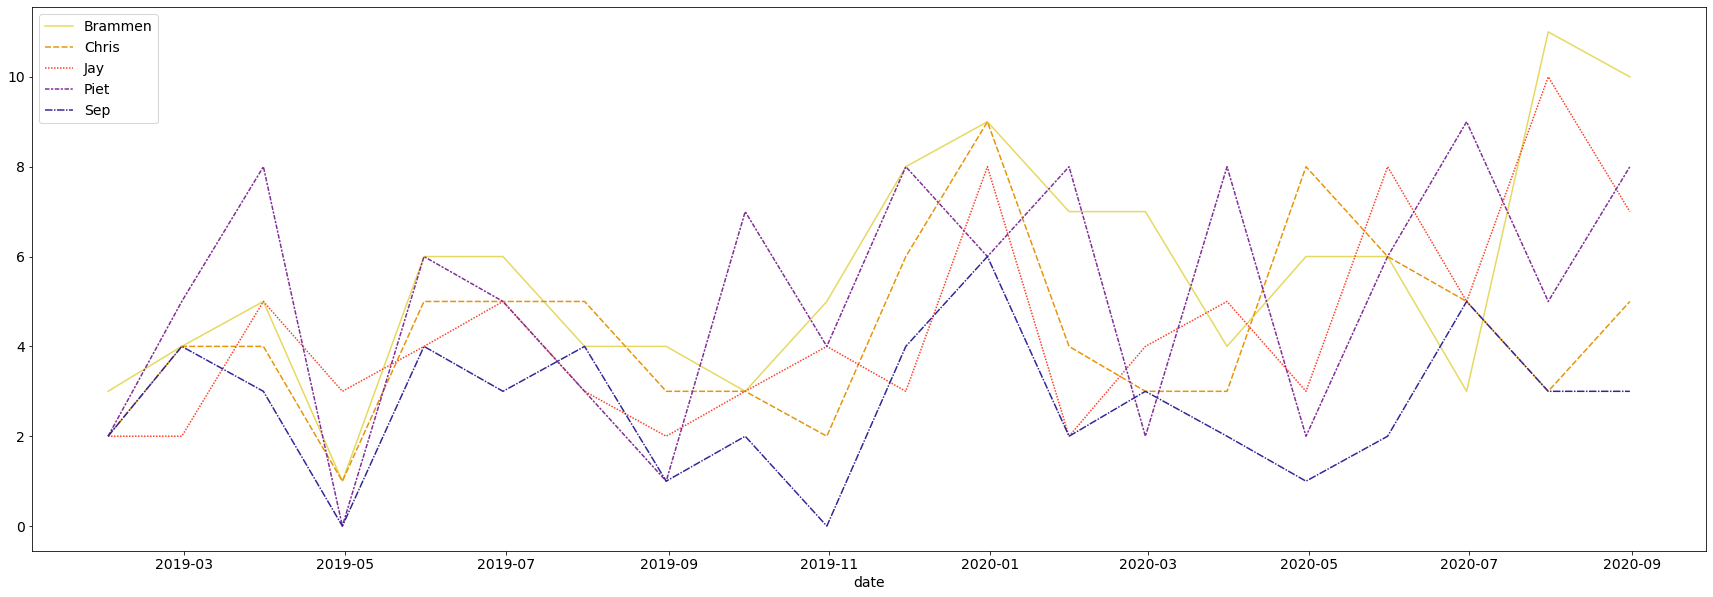

In [140]:
#Appearances over time, seit #Aufbruch
#No insights, abort.

app_over_time = app_df[app_df.index > '01.11.2019'].resample('M').sum()

plt.figure(figsize=(30,10))
sns.lineplot(data=app_over_time, palette='CMRmap_r')

In [141]:
#Kommen Jungs nur vor wenn eh alle drauf sind?
#zsm steht für zusammen.

zsm_df = df[['date', 'Brammen', 'Chris', 'Jay', 'Piet', 'Sep', 'Sum']]

zsm_sep = round(zsm_df[(zsm_df['Sep']==1) & (zsm_df['Sum']==1)].count()[0] / zsm_df[zsm_df['Sep']==1].count()[0] *100, 2)
print('Wenn Sep auf einem Thumbnail ist, ist er zu {}% alleine darauf'.format(zsm_sep))

zsm_brammen = round(zsm_df[(zsm_df['Brammen']==1) & (zsm_df['Sum']==1)].count()[0] / zsm_df[zsm_df['Brammen']==1].count()[0] *100, 2)
print('Wenn Brammen auf einem Thumbnail ist, ist er zu {}% alleine darauf'.format(zsm_brammen))

zsm_chris = round(zsm_df[(zsm_df['Chris']==1) & (zsm_df['Sum']==1)].count()[0] / zsm_df[zsm_df['Chris']==1].count()[0] *100, 2)
print('Wenn Chris auf einem Thumbnail ist, ist er zu {}% alleine darauf'.format(zsm_chris))

zsm_piet = round(zsm_df[(zsm_df['Piet']==1) & (zsm_df['Sum']==1)].count()[0] / zsm_df[zsm_df['Piet']==1].count()[0] *100, 2)
print('Wenn Piet auf einem Thumbnail ist, ist er zu {}% alleine darauf'.format(zsm_piet))

zsm_jay = round(zsm_df[(zsm_df['Jay']==1) & (zsm_df['Sum']==1)].count()[0] / zsm_df[zsm_df['Jay']==1].count()[0] *100, 2)
print('Wenn Jay auf einem Thumbnail ist, ist er zu {}% alleine darauf'.format(zsm_jay))

Wenn Sep auf einem Thumbnail ist, ist er zu 23.14% alleine darauf
Wenn Brammen auf einem Thumbnail ist, ist er zu 39.3% alleine darauf
Wenn Chris auf einem Thumbnail ist, ist er zu 25.0% alleine darauf
Wenn Piet auf einem Thumbnail ist, ist er zu 30.77% alleine darauf
Wenn Jay auf einem Thumbnail ist, ist er zu 32.0% alleine darauf


In [142]:
for col in ['Brammen', 'Chris', 'Jay', 'Piet', 'Sep']:
    for column in ['Brammen', 'Chris', 'Jay', 'Piet', 'Sep']:
        x = round(zsm_df[(zsm_df[col]==1) & (zsm_df[column]==1)].count()[0] / zsm_df[zsm_df[col]==1].count()[0] *100, 2)
        print('Wenn {} im Thumbnail ist, ist zu {}% auch {} zu sehen.'.format(col, x, column))
    print('')
        

Wenn Brammen im Thumbnail ist, ist zu 100.0% auch Brammen zu sehen.
Wenn Brammen im Thumbnail ist, ist zu 47.16% auch Chris zu sehen.
Wenn Brammen im Thumbnail ist, ist zu 44.1% auch Jay zu sehen.
Wenn Brammen im Thumbnail ist, ist zu 51.09% auch Piet zu sehen.
Wenn Brammen im Thumbnail ist, ist zu 28.82% auch Sep zu sehen.

Wenn Chris im Thumbnail ist, ist zu 42.19% auch Brammen zu sehen.
Wenn Chris im Thumbnail ist, ist zu 100.0% auch Chris zu sehen.
Wenn Chris im Thumbnail ist, ist zu 38.67% auch Jay zu sehen.
Wenn Chris im Thumbnail ist, ist zu 63.28% auch Piet zu sehen.
Wenn Chris im Thumbnail ist, ist zu 27.73% auch Sep zu sehen.

Wenn Jay im Thumbnail ist, ist zu 57.71% auch Brammen zu sehen.
Wenn Jay im Thumbnail ist, ist zu 56.57% auch Chris zu sehen.
Wenn Jay im Thumbnail ist, ist zu 100.0% auch Jay zu sehen.
Wenn Jay im Thumbnail ist, ist zu 59.43% auch Piet zu sehen.
Wenn Jay im Thumbnail ist, ist zu 32.57% auch Sep zu sehen.

Wenn Piet im Thumbnail ist, ist zu 42.86% auch 

In [143]:
Heatmap_df = df[['Brammen', 'Chris', 'Jay', 'Piet', 'Sep', 'date']].set_index('date')
Heatmap_df

,Brammen,Chris,Jay,Piet,Sep
date,,,,,
2020-08-27,1.0,0.0,0.0,0.0,0.0
2020-08-27,1.0,1.0,1.0,1.0,1.0
2020-08-26,1.0,1.0,0.0,1.0,1.0
2020-08-25,0.0,0.0,0.0,1.0,0.0
2020-08-24,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
2012-03-02,0.0,0.0,0.0,0.0,0.0
2012-02-26,0.0,0.0,0.0,0.0,0.0
2012-02-25,0.0,0.0,0.0,0.0,0.0


Text(0.5, 1.0, 'Wie oft wer mit wem zu sehen ist')

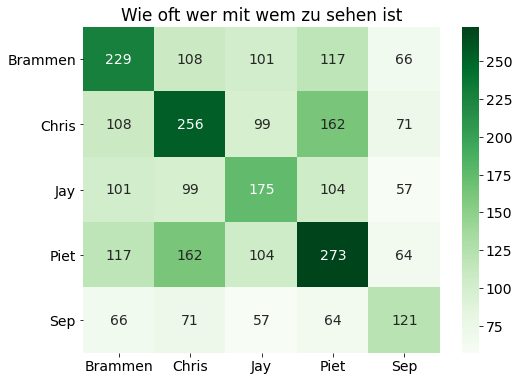

In [144]:
#Wer mit wem (insgesamt)
heatmap_df = pd.DataFrame(columns=['Brammen', 'Chris', 'Jay', 'Piet', 'Sep'])
for col in Heatmap_df.columns:
    for column in Heatmap_df.columns:
        heatmap_df.loc[column,col] = Heatmap_df[(Heatmap_df[col]==1)&(Heatmap_df[column]==1)].count()[0]

heatmap_df[heatmap_df.columns] = heatmap_df[heatmap_df.columns].astype(int)

heatmap_df
plt.figure(figsize=(8,6))
sns.heatmap(data=heatmap_df, annot=True, fmt='g',cmap='Greens')
plt.title('Wie oft wer mit wem zu sehen ist')

#plt.savefig('Wer_mit_wem.jpg')

Text(0.5, 1.0, 'Wie oft wer mit wem zu sehen ist')

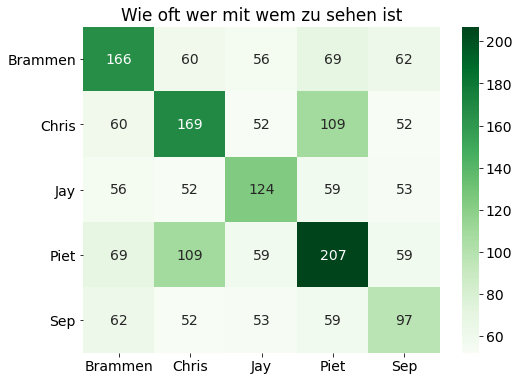

In [145]:
#Wer mit wem (seit #Aufbruch)
heatmap_df = pd.DataFrame(columns=['Brammen', 'Chris', 'Jay', 'Piet', 'Sep'])
for col in Heatmap_df.columns:
    for column in Heatmap_df.columns:
        heatmap_df.loc[column,col] = Heatmap_df[(Heatmap_df[col]==1)&(Heatmap_df[column]==1)&(Heatmap_df.index>'01.11.2017')].count()[0]

heatmap_df[heatmap_df.columns] = heatmap_df[heatmap_df.columns].astype(int)

heatmap_df
plt.figure(figsize=(8,6))
sns.heatmap(data=heatmap_df, annot=True, fmt='g',cmap='Greens')
plt.title('Wie oft wer mit wem zu sehen ist')

#plt.savefig('Wer_mit_wem_nach_Aufbruch.jpg')

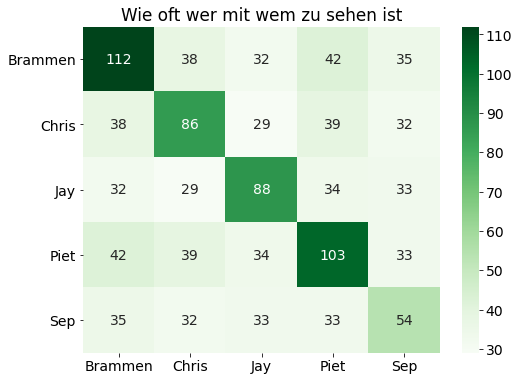

In [146]:
#Wer mit wem (seit Daily Reacts)
heatmap_df = pd.DataFrame(columns=['Brammen', 'Chris', 'Jay', 'Piet', 'Sep'])
for col in Heatmap_df.columns:
    for column in Heatmap_df.columns:
        heatmap_df.loc[column,col] = Heatmap_df[(Heatmap_df[col]==1)&(Heatmap_df[column]==1)&(Heatmap_df.index>'01.11.2019')].count()[0]

heatmap_df[heatmap_df.columns] = heatmap_df[heatmap_df.columns].astype(int)

heatmap_df
plt.figure(figsize=(8,6))
sns.heatmap(data=heatmap_df, annot=True, fmt='g',cmap='Greens')
plt.title('Wie oft wer mit wem zu sehen ist')

plt.savefig('Wer_mit_wem_seit_Daily.jpg')

In [147]:
#Sep nur drauf, wenn alle drauf sind?.

sep_alle = round(zsm_df[(zsm_df['Sep']==1) & (zsm_df['Sum']==1) & (zsm_df['date']>'01.11.2019')].count()[0] / zsm_df[(zsm_df['Sep']==1) & (zsm_df['date']>'01.11.2019')].count()[0] *100, 2)
print('Wenn Sep auf einem Thumbnail ist, sind zu {}% alle darauf'.format(sep_alle))



Wenn Sep auf einem Thumbnail ist, sind zu 29.63% alle darauf


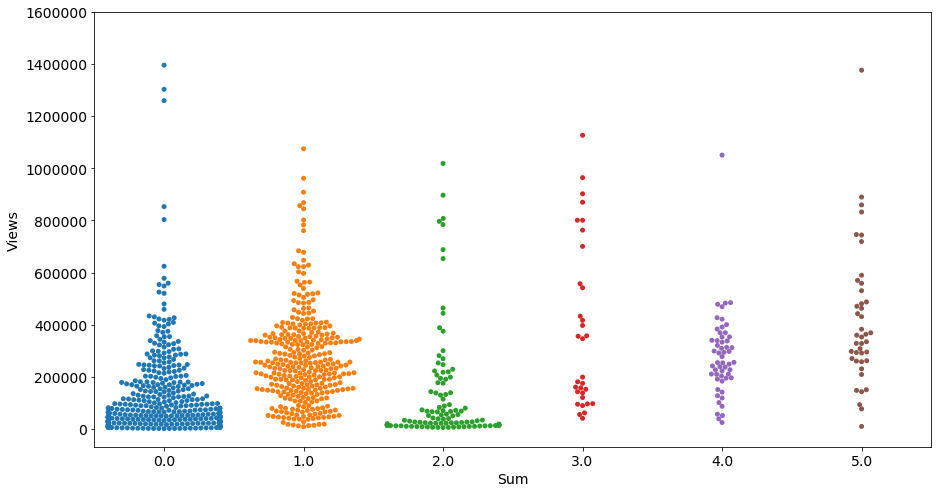

In [148]:
#Klickzahlen nach Anzahl derJungs auf dem Thumbnail (insgesamt)

view_df = df[['date', 'Brammen', 'Chris', 'Jay', 'Piet', 'Sep', 'Sum', 'Views']]#[df['date']>'01.01.2018']

view_per_app = view_df.sort_values(by='Views', ascending=False)
view_per_app
plt.figure(figsize=(15,8))
sns.swarmplot(x="Sum", y="Views", data=view_per_app)
plt.yticks(range(0, 1700000, 200000))
plt.ticklabel_format(style='plain', axis='y', scilimits=(0,0))

#plt.savefig('Klickzahlen_pro_Anzahl.jpg')

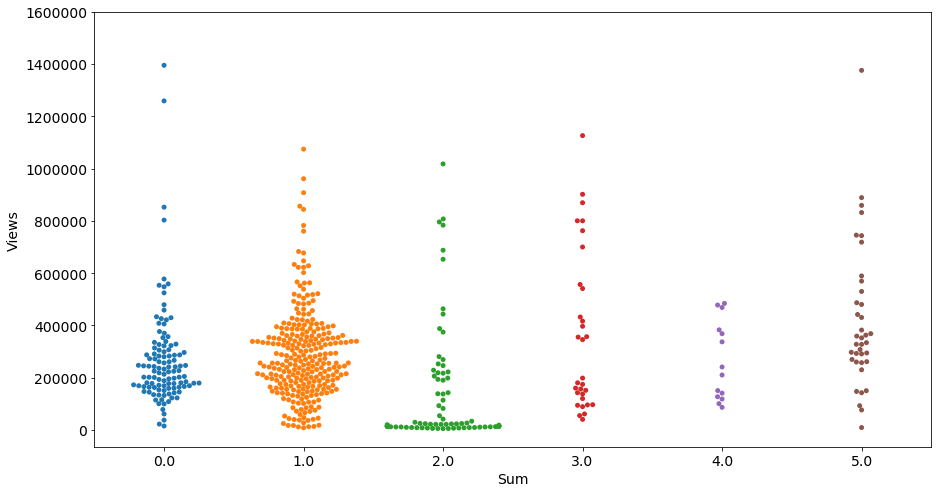

In [149]:
#Klickzahlen nach Anzahl derJungs auf dem Thumbnail (seit #Aufbruch)
view_df = df[['date', 'Brammen', 'Chris', 'Jay', 'Piet', 'Sep', 'Sum', 'Views']][df['date']>'01.01.2018']

view_per_app = view_df.sort_values(by='Views', ascending=False)
view_per_app
plt.figure(figsize=(15,8))
sns.swarmplot(x="Sum", y="Views", data=view_per_app)
plt.yticks(range(0, 1700000, 200000))
plt.ticklabel_format(style='plain', axis='y', scilimits=(0,0))

#plt.savefig('Klickzahlen_pro_Anzahl_seit_Aufbruch.jpg')

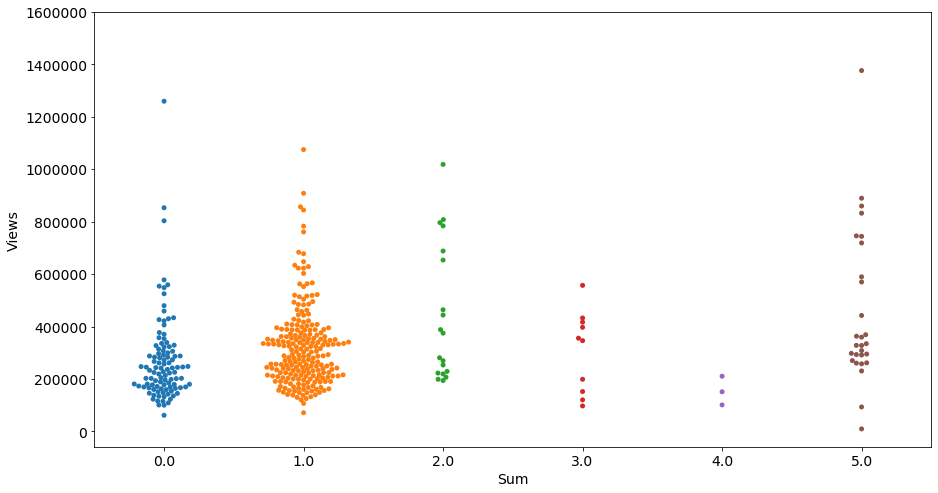

In [150]:
#Klickzahlen nach Anzahl derJungs auf dem Thumbnail (seit Daily Reacts)
view_df = df[['date', 'Brammen', 'Chris', 'Jay', 'Piet', 'Sep', 'Sum', 'Views']][df['date']>'01.11.2019']

view_per_app = view_df.sort_values(by='Views', ascending=False)
view_per_app
plt.figure(figsize=(15,8))
sns.swarmplot(x="Sum", y="Views", data=view_per_app)
plt.yticks(range(0, 1700000, 200000))
plt.ticklabel_format(style='plain', axis='y', scilimits=(0,0))

#plt.savefig('Klickzahlen_pro_Anzahl_seit_Daily.jpg')

In [151]:
brammen_views = view_df[view_df['Brammen']==1]['Views'].mean()
print('Wenn Brammen im Thumbnail ist, hat das Video im Schnitt {} Views.'.format(round(brammen_views)))

chris_views = view_df[view_df['Chris']==1]['Views'].mean()
print('Wenn Chris im Thumbnail ist, hat das Video im Schnitt {} Views.'.format(round(chris_views)))

jay_views = view_df[view_df['Jay']==1]['Views'].mean()
print('Wenn Jay im Thumbnail ist, hat das Video im Schnitt {} Views.'.format(round(jay_views)))

piet_views = view_df[view_df['Piet']==1]['Views'].mean()
print('Wenn Piet im Thumbnail ist, hat das Video im Schnitt {} Views.'.format(round(piet_views)))

sep_views = view_df[view_df['Sep']==1]['Views'].mean()
print('Wenn Sep im Thumbnail ist, hat das Video im Schnitt {} Views.'.format(round(sep_views)))

Wenn Brammen im Thumbnail ist, hat das Video im Schnitt 361530 Views.
Wenn Chris im Thumbnail ist, hat das Video im Schnitt 380555 Views.
Wenn Jay im Thumbnail ist, hat das Video im Schnitt 370051 Views.
Wenn Piet im Thumbnail ist, hat das Video im Schnitt 354955 Views.
Wenn Sep im Thumbnail ist, hat das Video im Schnitt 386131 Views.


In [152]:
#Beste Videos und wer drauf war
view_df = df[['date', 'Brammen', 'Chris', 'Jay', 'Piet', 'Sep', 'Sum', 'Views']]
view_df.sort_values(by='Views', ascending=False)

,date,Brammen,Chris,Jay,Piet,Sep,Sum,Views
394,2018-12-20,0.0,0.0,0.0,0.0,0.0,0.0,1395701
205,2020-02-02,1.0,1.0,1.0,1.0,1.0,5.0,1376376
848,2013-06-11,0.0,0.0,0.0,0.0,0.0,0.0,1302978
373,2019-02-24,0.0,0.0,0.0,0.0,0.0,0.0,1259457
479,2018-06-17,1.0,0.0,0.0,1.0,1.0,3.0,1126661
...,...,...,...,...,...,...,...,...
844,2013-06-11,0.0,0.0,0.0,0.0,0.0,0.0,1678
814,2013-06-12,0.0,0.0,0.0,0.0,0.0,0.0,1631
821,2013-06-11,0.0,0.0,0.0,0.0,0.0,0.0,1600
849,2013-06-11,0.0,0.0,0.0,0.0,0.0,0.0,1490


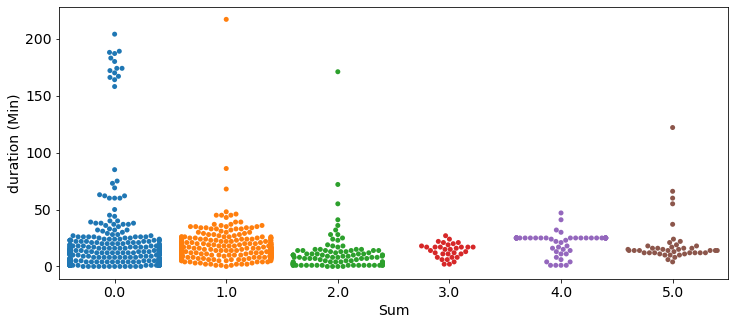

In [153]:
dur_df = df[['date', 'Brammen', 'Chris', 'Jay', 'Piet', 'Sep', 'Sum', 'duration (Min)']]

plt.figure(figsize=(12,5))
sns.swarmplot(x="Sum", y="duration (Min)", data=dur_df)

#plt.savefig('Dauer_pro_Anzahl.jpg')

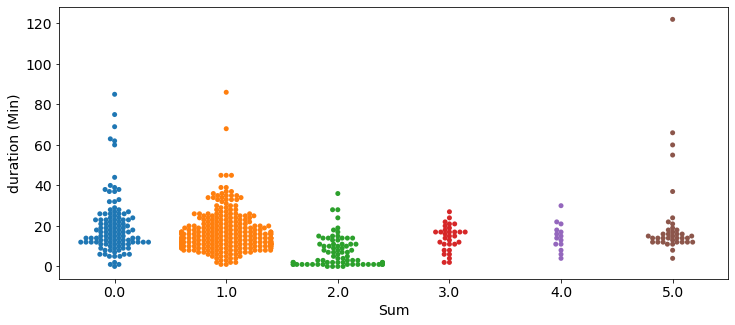

In [154]:
dur_df = df[['date', 'Brammen', 'Chris', 'Jay', 'Piet', 'Sep', 'Sum', 'duration (Min)']][df['date']>'01.01.2018']

plt.figure(figsize=(12,5))
sns.swarmplot(x="Sum", y="duration (Min)", data=dur_df)

#plt.savefig('Dauer_pro_Anzahl_seit_Aufbruch.jpg')

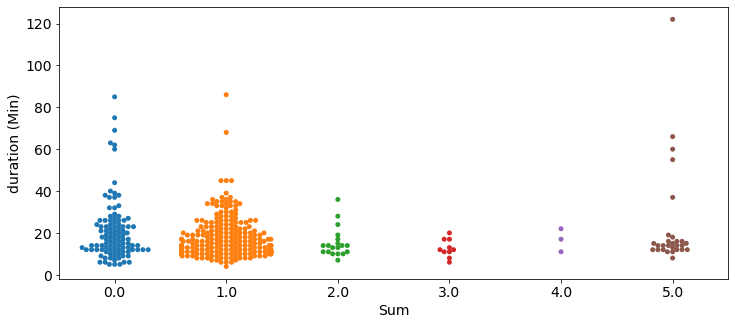

In [155]:
dur_df = df[['date', 'Brammen', 'Chris', 'Jay', 'Piet', 'Sep', 'Sum', 'duration (Min)']][df['date']>'01.11.2019']

plt.figure(figsize=(12,5))
sns.swarmplot(x="Sum", y="duration (Min)", data=dur_df)

#plt.savefig('Dauer_pro_Anzahl_seit_Daily.jpg')

In [156]:
brammen_dur = dur_df[dur_df['Brammen']==1]['duration (Min)']
print('Wenn Brammen im Thumbnail ist, geht das Video im Schnitt {} Min.'.format(round(brammen_dur.mean())))

chris_dur = dur_df[dur_df['Chris']==1]['duration (Min)']
print('Wenn Chris im Thumbnail ist, geht das Video im Schnitt {} Min.'.format(round(chris_dur.mean())))

jay_dur = dur_df[dur_df['Jay']==1]['duration (Min)']
print('Wenn Jay im Thumbnail ist, geht das Video im Schnitt {} Min.'.format(round(jay_dur.mean())))

piet_dur = dur_df[dur_df['Piet']==1]['duration (Min)']
print('Wenn Piet im Thumbnail ist, geht das Video im Schnitt {} Min.'.format(round(piet_dur.mean())))

sep_dur = dur_df[dur_df['Sep']==1]['duration (Min)']
print('Wenn Sep im Thumbnail ist, geht das Video im Schnitt {} Min.'.format(round(sep_dur.mean())))

Wenn Brammen im Thumbnail ist, geht das Video im Schnitt 19 Min.
Wenn Chris im Thumbnail ist, geht das Video im Schnitt 18 Min.
Wenn Jay im Thumbnail ist, geht das Video im Schnitt 19 Min.
Wenn Piet im Thumbnail ist, geht das Video im Schnitt 19 Min.
Wenn Sep im Thumbnail ist, geht das Video im Schnitt 21 Min.


Text(0, 0.5, 'Anzahl der 10-Minuten Videos')

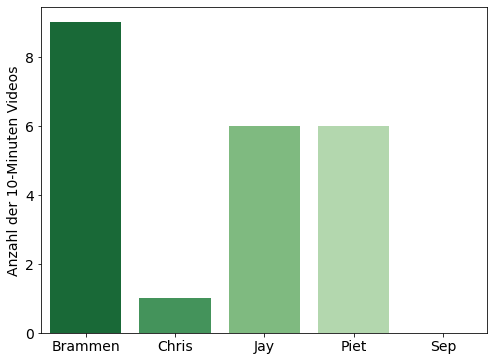

In [157]:
gestreckt = dur_df[dur_df['duration (Min)']==10].sum()

plt.figure(figsize=(8,6))
sns.barplot(x=gestreckt.index[0:5], y=gestreckt.values[0:5], palette='Greens_r')
plt.ylabel('Anzahl der 10-Minuten Videos')

#plt.savefig('10_Minuten_gestreckt.jpg')

In [158]:
df['Paths'] = df['Paths'].str.replace('.info.json','')
df = df.set_index('Paths')
df

,date,Brammen,Chris,Jay,Piet,Sep,Sum,Average,Views,duration (Min)
Paths,,,,,,,,,,
React _ PietSmiet kocht Maggi Fix ohne Maggi Fix__Teq3VLX0YUM,2020-08-27,1.0,0.0,0.0,0.0,0.0,1.0,0.0,139393,28
gamescom Opening Night Live React_N6FfpOFo02M,2020-08-27,1.0,1.0,1.0,1.0,1.0,5.0,0.0,9452,122
React _ gamescom 2012 _ Der Samstag__rfq8LJMg28Q,2020-08-26,1.0,1.0,0.0,1.0,1.0,4.0,0.0,150908,22
React _ I Made Millions by Managing a Team of Cheaters _ Esports Life Tycoon_bnVJUtfDnmo,2020-08-25,0.0,0.0,0.0,1.0,0.0,1.0,0.0,149513,21
React _ Google Translate kocht einen Shepard_s Pie_JZjJJpOQPdo,2020-08-24,1.0,0.0,0.0,0.0,0.0,1.0,0.0,129810,8
...,...,...,...,...,...,...,...,...,...,...
Angetestet _ Brawl Busters _Deutsch_Full_HD_ _ Brawlgamer 1_2_YLVXbHlIeoQ,2012-03-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24277,17
Angetestet _ Syndicate _Deutsch_Full_HD_ _ Die erste Stunde 4_4_lMt5VHd_2NM,2012-02-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18087,15
Angetestet _ Syndicate _Deutsch_Full_HD_ _ Die erste Stunde 3_4_Xa2ciPHHTxg,2012-02-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18068,15


In [164]:
df_test = pd.read_csv('../input/pietsmiet-tv-thumbnails/Dataframe_jpg_only3.csv')
df_test['json'] = df_test['json'].str.replace('/Users/Frank/Desktop/PietSmietTV Thumbnails/', '').str.replace('.info.json', '')
df_test = df_test[['json', 'keys']].set_index('keys')
df_test

,json
keys,
_ForzaFuel EVENT _ Hardi und hei_e Boliden __ Forza Horizon 2 Event__3VynBlFX5M,#ForzaFuel EVENT - Hardi und heiße Boliden «» ...
_KOFL _ Chris kommt bei EUCH putzen_4NAIT_hMs5g,#KOFL - Chris kommt bei EUCH putzen-4NAIT_hMs5g
_KOFL _ Delphinsuche_UJBMbSFvGEE,#KOFL - Delphinsuche-UJBMbSFvGEE
_KOFL _ Ein neuer Ko_nig muss her_xEj9_AYEujI,#KOFL - Ein neuer König muss her-xEj9-AYEujI
_KOFL _ Im Kinderparadies_ZwfV_xshzis,#KOFL - Im Kinderparadies-ZwfV_xshzis
...,...
Xbox One _ Spiele aufzeichnen und hochladen _Game DVR__BOjgaPRdyV0,Xbox One - Spiele aufzeichnen und hochladen (G...
Xbox One _ Unboxing _ Unpacking_WMXKAzjjNOI,Xbox One - Unboxing _ Unpacking-WMXKAzjjNOI
Youtube Rewind 2018 REACT_Rn_BY0XVl_I,Youtube Rewind 2018 REACT-Rn_BY0XVl-I


In [168]:
df_final = df.join(df_test, how='outer')
df_final

,date,Brammen,Chris,Jay,Piet,Sep,Sum,Average,Views,duration (Min),json
1 Stunde React auf _Oben inna Su_d_ mit Knossi und MontanaBlack__mN7L62eHU0,2020-01-18,0.0,0.0,0.0,0.0,0.0,0.0,1.571429,338743,63,1 Stunde React auf 'Oben inna Süd' mit Knossi...
3 Bildschirme im Weltraum _ GEEK 2015_d8GosUxn90Y,2015-03-02,0.0,0.0,0.0,0.0,0.0,0.0,0.857143,34533,3,3 Bildschirme im Weltraum - GEEK 2015-d8GosUxn90Y
5 Erwachsene im Kinderparadies_ntkzvT1rYLs,2018-08-12,1.0,1.0,1.0,1.0,1.0,5.0,1.714286,530238,17,5 Erwachsene im Kinderparadies-ntkzvT1rYLs
ADAC Fahrsicherheitstraining mit meinem BMW_8zsxJWAl0TE,2018-07-19,0.0,1.0,0.0,0.0,0.0,1.0,2.142857,87115,4,ADAC Fahrsicherheitstraining mit meinem BMW-8z...
Abgezockt_ verarscht und angepackt _ Sep deckt auf_3EyAQLhFT7g,2018-06-06,0.0,0.0,0.0,0.0,1.0,1.0,1.571429,53414,7,"Abgezockt, verarscht und angepackt - Sep deckt..."
...,...,...,...,...,...,...,...,...,...,...,...
_KOFL _ Im Kinderparadies_ZwfV_xshzis,2014-12-09,0.0,1.0,0.0,0.0,0.0,1.0,0.571429,57061,15,#KOFL - Im Kinderparadies-ZwfV_xshzis
_LemonFaceChallenge _ Zusammen gegen den Hunger_fmNCbO0njlk,2014-10-12,1.0,1.0,1.0,1.0,1.0,5.0,0.571429,208769,6,#LemonFaceChallenge - Zusammen gegen den Hunge...
_PietCast_ _6 _ Deutschland stinkt ab_MhkmzNhIXfA,2015-04-07,0.0,0.0,0.0,0.0,0.0,0.0,1.428571,124181,183,‎PietCast‬ #6 – Deutschland stinkt ab-MhkmzNhIXfA
_SaveYourInternet Challenge _ Was ist los mit Artikel 13_KClNiOTcyz8,2018-11-16,0.0,0.0,0.0,1.0,0.0,1.0,2.571429,107211,5,#SaveYourInternet Challenge - Was ist los mit ...


In [169]:
df_final = df_final.rename(columns={'json':'index'})
df_final = df_final.set_index('index')
df_final

,date,Brammen,Chris,Jay,Piet,Sep,Sum,Average,Views,duration (Min)
index,,,,,,,,,,
1 Stunde React auf 'Oben inna Süd' mit Knossi und MontanaBlack--mN7L62eHU0,2020-01-18,0.0,0.0,0.0,0.0,0.0,0.0,1.571429,338743,63
3 Bildschirme im Weltraum - GEEK 2015-d8GosUxn90Y,2015-03-02,0.0,0.0,0.0,0.0,0.0,0.0,0.857143,34533,3
5 Erwachsene im Kinderparadies-ntkzvT1rYLs,2018-08-12,1.0,1.0,1.0,1.0,1.0,5.0,1.714286,530238,17
ADAC Fahrsicherheitstraining mit meinem BMW-8zsxJWAl0TE,2018-07-19,0.0,1.0,0.0,0.0,0.0,1.0,2.142857,87115,4
"Abgezockt, verarscht und angepackt - Sep deckt auf-3EyAQLhFT7g",2018-06-06,0.0,0.0,0.0,0.0,1.0,1.0,1.571429,53414,7
...,...,...,...,...,...,...,...,...,...,...
#KOFL - Im Kinderparadies-ZwfV_xshzis,2014-12-09,0.0,1.0,0.0,0.0,0.0,1.0,0.571429,57061,15
#LemonFaceChallenge - Zusammen gegen den Hunger-fmNCbO0njlk,2014-10-12,1.0,1.0,1.0,1.0,1.0,5.0,0.571429,208769,6
‎PietCast‬ #6 – Deutschland stinkt ab-MhkmzNhIXfA,2015-04-07,0.0,0.0,0.0,0.0,0.0,0.0,1.428571,124181,183


In [172]:
df_final.to_excel('PietSmietTV Thumbnail-Analysis.xlsx')